## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [4]:
! git clone https://github.com/ds4e/EDA


Cloning into 'EDA'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 76 (delta 17), reused 12 (delta 12), pack-reused 45 (from 2)
Receiving objects: 100% (76/76), 26.04 MiB | 21.77 MiB/s, done.
Resolving deltas: 100% (22/22), done.


Question 1/3

In [9]:
import pandas as pd
#
var_list = ['year','educ','age','sex','agekdbrn','wrkstat','hrs1',
            'prestg10','marital','cowrksta','sppres10',
            'earnrs','income'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [10]:
new_df = pd.read_csv('selected_gss_data.csv')
new_df.head(30)

,year,educ,age,sex,agekdbrn,wrkstat,hrs1,prestg10,marital,cowrksta,sppres10,earnrs,income
0,1972,16.0,23.0,female,NaN,working full time,NaN,45.0,never married,NaN,NaN,1.0,NaN
1,1972,10.0,70.0,male,NaN,retired,NaN,50.0,married,NaN,NaN,0.0,NaN
2,1972,12.0,48.0,female,NaN,working part time,NaN,49.0,married,NaN,41.0,2.0,NaN
3,1972,17.0,27.0,female,NaN,working full time,NaN,60.0,married,NaN,39.0,2.0,NaN
4,1972,12.0,61.0,female,NaN,keeping house,NaN,31.0,married,NaN,38.0,1.0,NaN
5,1972,14.0,26.0,male,NaN,working full time,NaN,45.0,never married,NaN,NaN,1.0,NaN
6,1972,13.0,28.0,male,NaN,working full time,NaN,43.0,divorced,NaN,NaN,1.0,NaN
7,1972,16.0,27.0,male,NaN,working full time,NaN,33.0,never married,NaN,NaN,1.0,NaN
8,1972,12.0,21.0,female,NaN,working part time,NaN,33.0,never married,NaN,NaN,1.0,NaN
9,1972,12.0,30.0,female,NaN,working full time,NaN,25.0,married,NaN,25.0,2.0,NaN


Question 2

The variables I chose from the General Social Survey (GSS) offer a broad look at how different aspects of life—education, work, income, and family—are connected. By including year, I can track changes over time and see how people’s experiences have evolved. Education (educ) is important because it often shapes job opportunities, income, and overall social status. Age helps show how different stages of life impact work, family, and financial stability.

Sex is useful for understanding gender differences in education, work, and income. Age at first birth (agekdbrn) gives insight into how starting a family early or later in life might affect career and financial situations. Work status (wrkstat) and hours worked per week (hrs1) help analyze employment trends and work-life balance, especially when compared with income and prestige of occupation (prestg10), which can reveal patterns in social class and job satisfaction.

Family life also plays a role in shaping these outcomes. Marital status (marital) can affect work and income, while co-worker status (cowrksta) might show how social interactions at work impact job satisfaction. Social presence (sppres10) could indicate how connected people feel in their communities, and earnings (earnrs) and income provide key measures of financial well-being.

By making graphics of these variables and the ways they interact with each other, I think it will be revealing of broader trends in American society. That is the hope at least!

In [16]:
#Describing the data so I can see where I might need to clean variables
print(df.describe(),'\n')

               year            id          hrs1        hrs2  occ  prestige  \
count  24130.000000  24130.000000  13712.000000  479.000000  0.0       0.0   
mean    2015.050974   1660.270949     41.155849   38.970772  NaN       NaN   
std        5.526059   1106.843749     14.205623   13.059695  NaN       NaN   
min     2006.000000      1.000000      0.000000    1.000000  NaN       NaN   
25%     2010.000000    763.000000     36.000000   35.000000  NaN       NaN   
50%     2016.000000   1525.000000     40.000000   40.000000  NaN       NaN   
75%     2021.000000   2337.750000     49.000000   45.000000  NaN       NaN   
max     2022.000000   4510.000000     89.000000   84.000000  NaN       NaN   

       commute     prestg80        indus07        occonet  ...    agehef8  \
count      0.0  6431.000000    1814.000000    1847.000000  ...   3.000000   
mean       NaN    43.566475  555467.982359  355333.225322  ...  33.666667   
std        NaN    13.872802  182277.853905  127688.069583  ...  56

Question 3 - Cleaning

In [11]:
#Cleaned the data by dropping all the NaN values
new_df = new_df.dropna()
new_df.head(30)

,year,educ,age,sex,agekdbrn,wrkstat,hrs1,prestg10,marital,cowrksta,sppres10,earnrs,income
62476,2018,19.0,59.0,male,30.0,working full time,40.0,72.0,divorced,working full time,24.0,1.0,"$25,000 or more"
62541,2018,14.0,33.0,female,25.0,working full time,32.0,32.0,never married,working full time,40.0,4.0,"$25,000 or more"
62548,2018,12.0,37.0,female,22.0,working full time,40.0,51.0,divorced,working full time,38.0,3.0,"$25,000 or more"
62550,2018,12.0,70.0,male,25.0,working part time,20.0,35.0,separated,keeping house,35.0,1.0,"$25,000 or more"
62595,2018,18.0,39.0,female,32.0,working full time,40.0,67.0,never married,"unemployed, laid off, looking for work",58.0,2.0,"$25,000 or more"
62691,2018,15.0,29.0,female,25.0,working part time,30.0,33.0,never married,working full time,38.0,2.0,"$25,000 or more"
62695,2018,12.0,24.0,female,19.0,working part time,25.0,21.0,never married,working full time,35.0,2.0,"$25,000 or more"
62702,2018,10.0,62.0,female,17.0,working full time,40.0,25.0,widowed,retired,80.0,1.0,"$25,000 or more"
62712,2018,12.0,29.0,male,24.0,working full time,40.0,24.0,never married,working full time,47.0,3.0,"$25,000 or more"
62722,2018,12.0,36.0,male,28.0,working full time,48.0,50.0,never married,working full time,52.0,4.0,"$25,000 or more"


In [12]:
#cleaning "sex" variable by keeping only "female" and "male"
new_df = new_df[new_df['sex'].notna()]  # Remove rows with NaN in 'sex'
new_df = new_df[new_df['sex'].isin(['female', 'male'])]  # Keep only 'female' or 'male'

# Verify the changes
print(new_df['sex'].value_counts())

sex
female    91
male      83
Name: count, dtype: int64


Question 4 - Numeric Summaries and Visualizations

<ipython-input-27-86c0a50ffa2b>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( data=new_df, x=var, hue=conditioning, common_norm=False).set(title='Income by Age When First Child was Born')


[Text(0.5, 1.0, 'Income by Age When First Child was Born')]

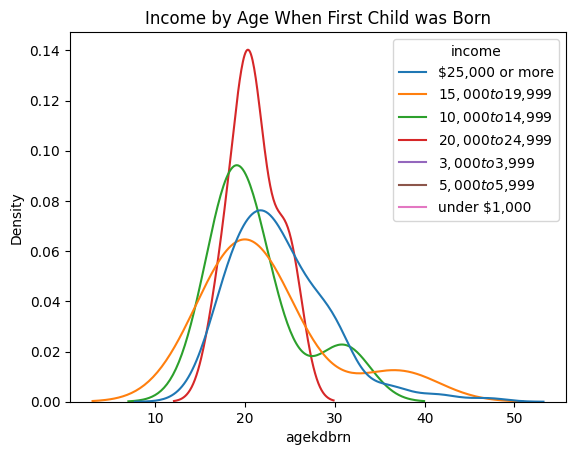

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

conditioning = 'income'
var = 'agekdbrn'
sns.kdeplot( data=new_df, x=var, hue=conditioning, common_norm=False).set(title='Income by Age When First Child was Born')


<Axes: >

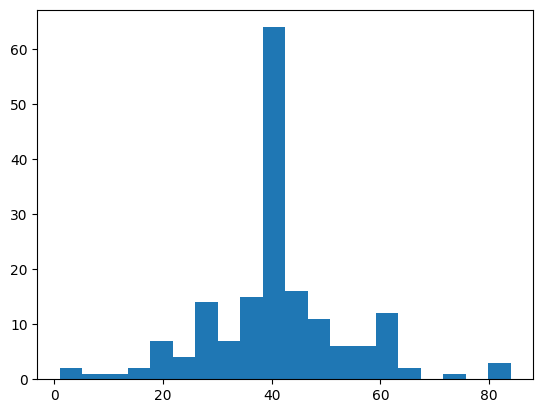

In [22]:
#Making a histogram of the hours (log)

new_df.loc[new_df['hrs1']>0,'hrs1'].hist(bins=20,grid=False)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

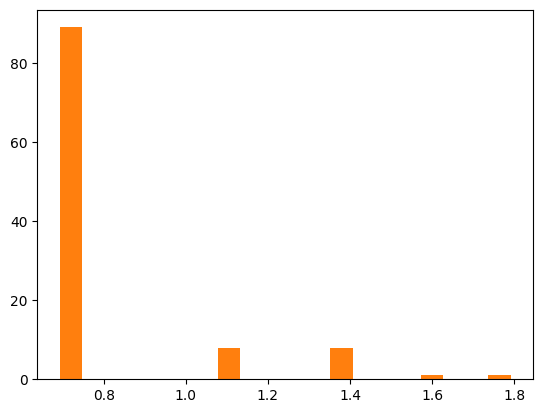

In [36]:
#Histogram for Income (w/ log)

new_df['earnrs_log'] = np.log(new_df['earnrs'])
# df['bond_log'].hist() # This crashes: We need to locate the non-infinte values
new_df.loc[new_df['earnrs_log']>0,'earnrs_log'].hist(bins=20,grid=False)



new_df['earnrs'] = np.log(new_df['earnrs'])

new_df.loc[new_df['earnrs']>0,'earnrs'].hist(bins=20,grid=False)

In [15]:
# Create a value counts table for the 'Gift Type' column
marital_counts = new_df['marital'].value_counts()

# Display the value counts
print(marital_counts)

marital
never married    108
divorced          52
widowed            8
separated          6
Name: count, dtype: int64


[Text(0.5, 1.0, 'Hours by Gender')]

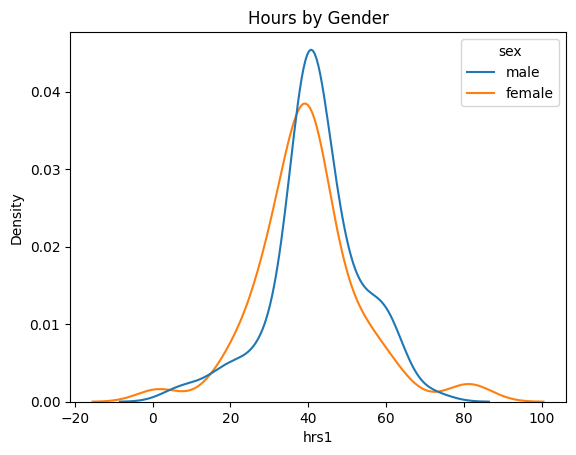

In [21]:
conditioning = 'sex'
var = 'hrs1'
sns.kdeplot( data=new_df, x=var, hue=conditioning, common_norm=False).set(title='Hours by Gender')

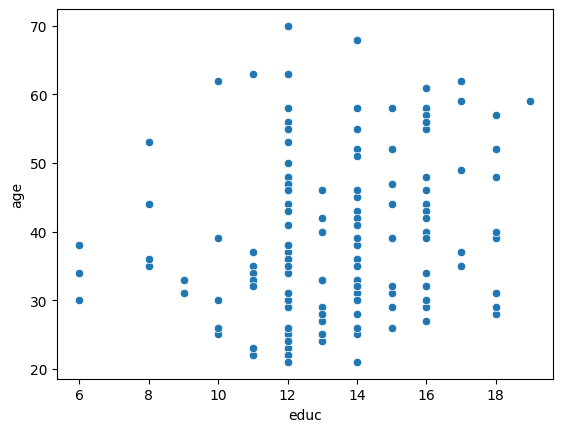

In [29]:
#Scatterplot of Age and Education

var1 = 'age'
var2 = 'educ'
sns.scatterplot(y=new_df[var1],x=new_df[var2]) # A scatterplot
plt.show()

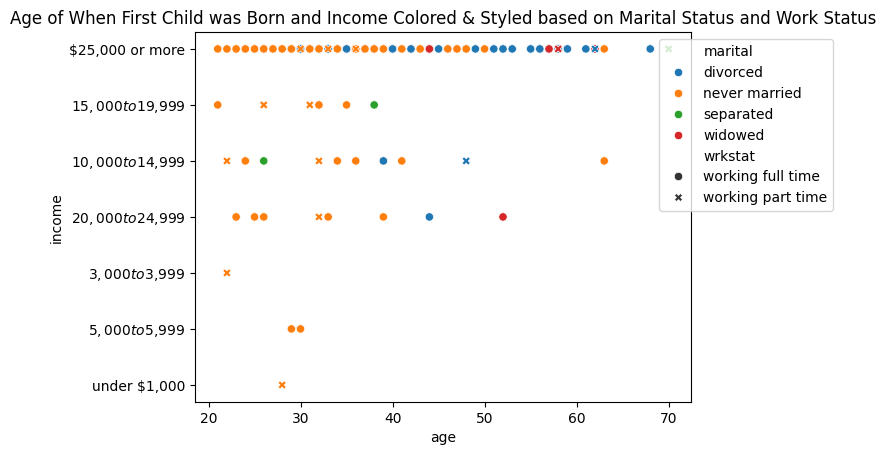

In [28]:
#Age of When First Child was Born and Income Colored & Styled based on Marital Status and Work Status
var1 = 'age' # A numeric variable
var2 = 'income' # Another numeric
cat1 = 'marital' # A categorical variable
cat2 = 'wrkstat' # A categorical variable


this_plot = sns.scatterplot(data=new_df, x=var1, y=var2, hue=cat1, style=cat2) # Two kinds of grouping
this_plot.set(title='Age of When First Child was Born and Income Colored & Styled based on Marital Status and Work Status')
sns.move_legend(this_plot, "upper right", bbox_to_anchor=(1.3, 1)) # Moves the Legend

In [30]:
#Computing a description of Income conditional on Sex and Age...

# Define the conditioning variables
conditioning = ['sex', 'age']

# Group by 'Room Type' and 'Property Type', and compute the description of 'Price'
income_description = new_df.groupby(conditioning)['income'].describe()

# Display the result
print(income_description)

            count unique              top freq
sex    age                                    
female 21.0     2      2  $25,000 or more    1
       22.0     2      2  $25,000 or more    1
       23.0     2      2  $25,000 or more    1
       24.0     4      2  $25,000 or more    2
       25.0     4      1  $25,000 or more    4
...           ...    ...              ...  ...
male   59.0     2      1  $25,000 or more    2
       62.0     1      1  $25,000 or more    1
       63.0     2      2  $25,000 or more    1
       68.0     1      1  $25,000 or more    1
       70.0     1      1  $25,000 or more    1

[70 rows x 4 columns]


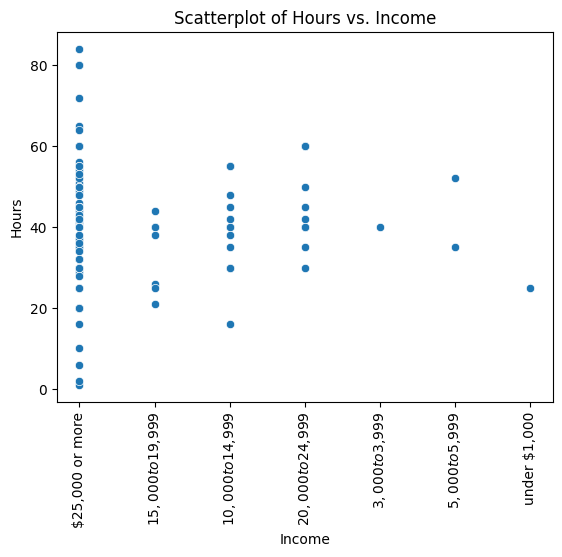

In [32]:
# Scatterplot of Hours and Income
var1 = 'hrs1'
var2 = 'income'
sns.scatterplot(y=new_df[var1], x=new_df[var2])  # A scatterplot

# Rotate the x-axis labels to vertical
plt.xticks(rotation=90)

# Add title and change axis labels
plt.title('Scatterplot of Hours vs. Income')
plt.xlabel('Income')
plt.ylabel('Hours')

# Show the plot
plt.show()

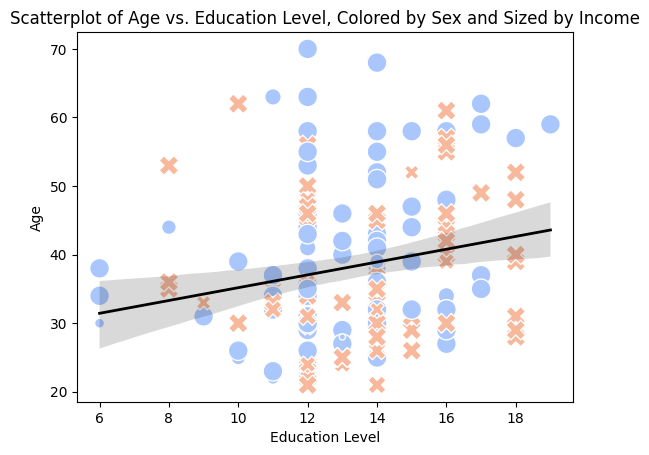

In [33]:
# Scatterplot of Age, Education, and Income
var1 = 'age'
var2 = 'educ'
sns.scatterplot(
    y=new_df[var1],
    x=new_df[var2],
    hue=new_df['sex'],
    size=new_df['income'],  # Size of points based on income
    palette='coolwarm',
    style=new_df['sex'],
    sizes=(20, 200),  # Adjust point size range for income
    legend=None  # Optionally remove legend for clarity
)

# Adding a regression line (optional)
sns.regplot(x=new_df[var2], y=new_df[var1], scatter=False, color='black', line_kws={'linewidth': 2})

# Customize axis labels and title
plt.title('Scatterplot of Age vs. Education Level, Colored by Sex and Sized by Income')
plt.xlabel('Education Level')
plt.ylabel('Age')

# Show the plot
plt.show()

In [34]:
# Cross-tabulate Sex and Work Status
sex_work_status_crosstab = pd.crosstab(new_df['sex'], new_df['wrkstat'])

# Display the cross-tabulation
print(sex_work_status_crosstab)

wrkstat  working full time  working part time
sex                                          
female                  71                 20
male                    73                 10
